In [1]:
!pip install cufflinks

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')
end1=datetime.date(2020,5,15)
start1=end1-pd.Timedelta(days=50)
df=yf.download('^NSEI',start=start1,end=end1)
#df=pd.read_csv('NSE_5min_interval.csv',index_col=0,parse_dates=True)


Exception in thread Thread-8:
Traceback (most recent call last):
  File "H:\anaconda\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "H:\anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "H:\anaconda\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "H:\anaconda\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "H:\anaconda\lib\site-packages\yfinance\multi.py", line 179, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "H:\anaconda\lib\site-packages\yfinance\base.py", line 157, in history
    data = data.json()
  File "H:\anaconda\lib\site-packages\requests\models.py", line 898, in json
    return complexjson.loads(self.text, **kwargs)
  File "H:\anaconda\lib\json\__init__.py", line 357, in loads
    return _de

In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0
2020-05-14 15:20:00+05:30,9139.400391,9151.349609,9130.250000,9145.500000,9145.500000,0
2020-05-14 15:25:00+05:30,9145.650391,9151.400391,9142.950195,9150.200195,9150.200195,0


In [26]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df1a=df.copy()

In [8]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
df1a[['Adj Close']].iplot()

In [6]:
import os
os.getcwd()
os.chdir('C:\\Users\\Prakyath\\python')
os.getcwd()

'C:\\Users\\Prakyath\\python'

<AxesSubplot:xlabel='Datetime'>

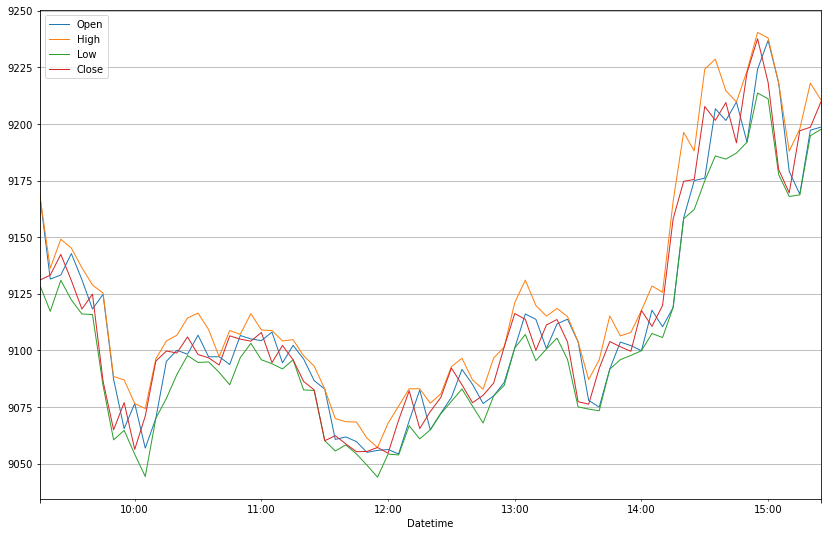

In [30]:
#Strategy # 1A: Simple Moving Average (Long only)
#Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
df1a.loc['12 May 2020',['Open','High','Low','Close']].plot(grid=True, linewidth=1, figsize=(14,9))


In [10]:
# Delete the columns 'High', 'Low' and Volume' from df1a
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)

In [11]:
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
df1a['cc_returns']=df1a['Close'].pct_change()

In [12]:
# Create a variable called sma and assign it a value 12
sma=12
# Create a column called 'sma' which is the 12-period moving average of the 'Close' price
df1a['sma']=df1a['Close'].rolling(window=sma).mean()

In [13]:
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition)
df1a['position']=np.where((df1a['Close']>df1a['sma']),1,0)
df1a['position']=df1a['position'].shift(1)

In [14]:
df1a['position'].value_counts()

1.0    1135
0.0    1106
Name: position, dtype: int64

In [15]:
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
df1a['strategy_returns']=df1a['cc_returns']*df1a['position']
df1a['strategy_returns']=1+df1a['strategy_returns']
df1a['cc_returns']=1+df1a['cc_returns']

In [47]:
df1a.tail()

,Open,Close,Adj Close,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0.999951,9149.166585,1.0,0.999951
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0.998677,9148.541585,1.0,0.998677
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,1.000290,9147.887451,0.0,1.000000
2020-05-14 15:20:00+05:30,9139.400391,9145.500000,9145.500000,1.000607,9147.991618,0.0,1.000000
2020-05-14 15:25:00+05:30,9145.650391,9150.200195,9150.200195,1.000514,9149.866618,0.0,1.000000


<AxesSubplot:xlabel='Datetime'>

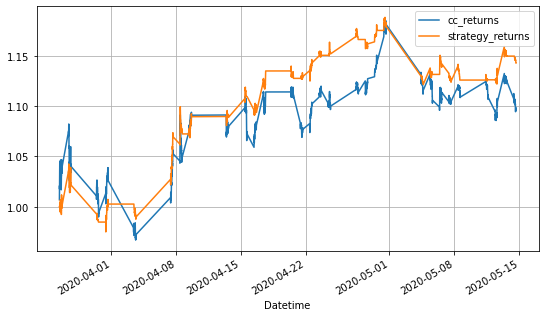

In [16]:
#Plot the returns for a buy-and-hold approach and the strategy we just created
df1a[['cc_returns','strategy_returns']].cumprod().plot(grid=True,figsize=(9,5))

In [17]:
print('Buy and hold returns:',np.round(df1a['cc_returns'].cumprod()[-1],2))
print('strategy returns:',np.round(df1a['strategy_returns'].cumprod()[-1],2))

Buy and hold returns: 1.1
strategy returns: 1.14


In [52]:
np.round?

Buy and hold returns:  1.1
Strategy returns:  1.14


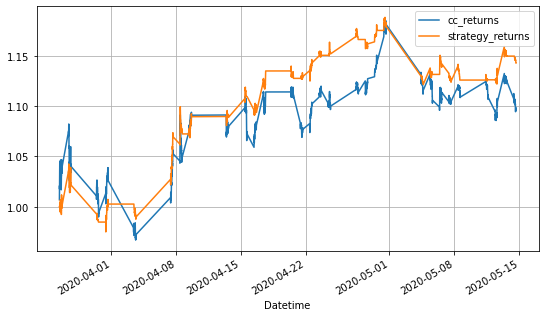

In [18]:
df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))

In [19]:
df1a

,Open,Close,Adj Close,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,NaN,NaN,NaN,NaN
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,1.006871,NaN,0.0,1.000000
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,1.009522,NaN,0.0,1.000000
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,1.001392,NaN,0.0,1.000000
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0.999894,NaN,0.0,1.000000
...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0.999951,9149.166585,1.0,0.999951
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0.998677,9148.541585,1.0,0.998677
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,1.000290,9147.887451,0.0,1.000000


                                  Open         High          Low        Close  \
Datetime                                                                        
2020-03-26 09:15:00+05:30  8451.000000  8457.650391  8338.400391  8339.349609   
2020-03-26 09:20:00+05:30  8336.400391  8411.799805  8309.950195  8396.650391   
2020-03-26 09:25:00+05:30  8396.849609  8476.950195  8372.099609  8476.599609   
2020-03-26 09:30:00+05:30  8476.900391  8518.450195  8460.000000  8488.400391   
2020-03-26 09:35:00+05:30  8490.099609  8515.000000  8482.349609  8487.500000   

                             Adj Close  Volume  cc_returns          ema  
Datetime                                                                 
2020-03-26 09:15:00+05:30  8339.349609       0         NaN  8339.349609  
2020-03-26 09:20:00+05:30  8396.650391       0    0.006871  8348.165114  
2020-03-26 09:25:00+05:30  8476.599609       0    0.009522  8367.924267  
2020-03-26 09:30:00+05:30  8488.400391       0    0.001392  83

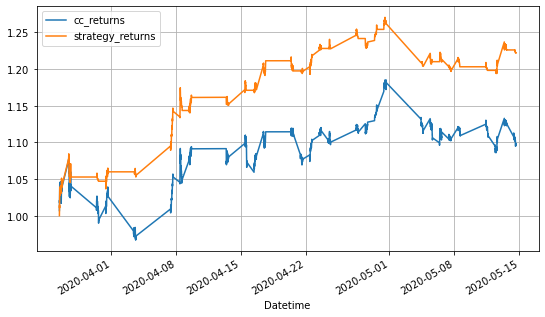

In [37]:
#Strategy # 1B: Exponential Moving Average (Long only)
df1b = df.copy()

df1b['cc_returns'] = df1b['Close'].pct_change()
ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
print(df1b.head())
print(df1b.tail())
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(1)

df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())

df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']


df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head())
print(df1b.tail())

df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))

In [43]:
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)

    return data

def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))

    return data

ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()
df.tail()

df2 = df.copy()
df2 = compute_daily_returns(data=df2)

df2.head()
#df2.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2005-07-05,119.250000,120.650002,119.190002,120.489998,87.970245,51549000,NaN
2005-07-06,120.389999,120.650002,119.410004,119.480003,87.232849,52363600,-0.008418
2005-07-07,118.290001,119.949997,118.260002,119.949997,87.575981,103268800,0.003926
2005-07-08,119.970001,121.320000,119.720001,121.320000,88.576241,64491200,0.011357
2005-07-11,121.330002,122.099998,121.309998,121.940002,89.028931,49688300,0.005097


In [ ]:
# Create a function called 'compute_indicators' where you add additional columns 'day', 'prev_day', 
# 'four_days_after', 'relative_range', 'rel_range_ma', and 'ibs' to df2 and compute them.

In [57]:
def compute_indicators(data):
    '''
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on mondays"trading strategy
    '''
    #columns created to check condition 1
    data['day']=data.index.day_name()
    data['prev_day']=data['day'].shift(1)
    data['four_days_after']=data['day'].shift(-4)
    
 #columns created to check conditions 2
 #Create a function called 'backtest_strategy' where you work with df2 from the previous step. 
#You can add additional 
# columns 'condition1', 'condition2', 'condition3' and use them to calculate strategy returns.
    data['relative_range']=(data['High']-data['Low'])/data['Close']
    data['rel_range_ma']=data['relative_range'].rolling(window=25).mean()
    #column created to check condition 3
    data['ibs']=(data['Close']-data['Low'])/(data['High']-data['Low'])
    return data
    
    

In [60]:

def backtest_strategy(data):
    '''
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on monday"trading strategy
    It then computes the strategy returns.
    Important:to be run only after the function comput_indicators.
    '''
    data['condition1']=np.where((data['day']=='Monday')
                               &(data['prev_day']=='Friday')
                               &(data['four_days_after']=='Friday'),
                                1,0)
    data['condition2']=np.where((1-data['Close']/data['Close'].shift(1))
                               >=0.25*data['rel_range_ma'],1,0)
    data['condition3']=np.where(data['ibs']<0.3,1,0)
    data['signal']=np.where((data['condition1']==1)
                           &(data['condition2']==1)
                           &(data['condition3']==1),
                           1,0)
    #the below two statements ensures that we can directly calculate strategy returns by multiplying the 
    #columns 'position' and 'cc_returns'
    data['signal']=data['signal'].shift(1)
    data['position']=data['signal'].replace(to_replace=0,method='ffill',limit=3)
    data['strategy_returns']=data['cc_returns']*data['position']
    return data
    

[*********************100%***********************]  1 of 1 completed
Buy and hold returns: 0.95
strategy returns: 0.98


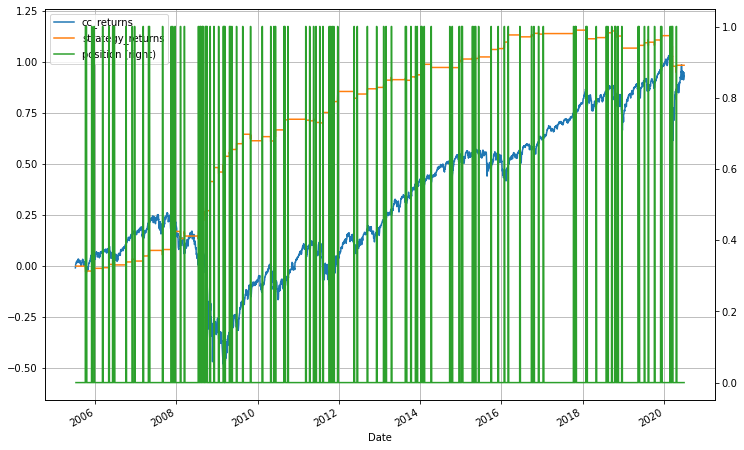

In [61]:
#Create a function called 'show_backtesting_results' where you use df2 and 
# print the strategy returns and buy-and-hold returns.
# The functions also plots the strategy returns, buy-and-hold returns and the positions over time.
def show_backtesting_results(data):
    '''
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy.
    It also plots a chart showing both returns and positions ovr time.
    Important:To be run only after the function backtest_strategy.
    '''
    print('Buy and hold returns:',np.round(data['cc_returns'].cumsum()[-1],2))
    print('strategy returns:',np.round(data['strategy_returns'].cumsum()[-1],2))
    data[['cc_returns','strategy_returns']]=data[['cc_returns','strategy_returns']].cumsum()
    data[['cc_returns','strategy_returns','position']].plot(secondary_y='position',grid=True,
                                                            figsize=(12,8))
df=download_daily_data(ticker2,start2,end2)
df2=df.copy()
df2=compute_daily_returns(df2)
df2=compute_indicators(df2)
df2=backtest_strategy(df2)
show_backtesting_results(df2)

In [ ]:
# Create a variable called end3 for today. Use the datetime library.
# Create a variable start3 which is 10 years before end3
# Use the yfinance library to download daily data into a variable df for "TATASTEEL.NS" 
# between start3 and end3.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
# If above step looks fine, create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


# **In case you do not have yfinance installed**, please use the attached csv file and import into pandas
# You can name the pandas DataFrame 'df'
# Check the data type, the dimensions, the first few and last few rows of 'df'
# Create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


In [64]:
ticker3='TATASTEEL.NS'
end3=datetime.date(2020,7,2)
start3=end3-pd.Timedelta(days=365*10)
df=yf.download(ticker3,start3,end3)
df3=df.copy()
df3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-05,453.502655,453.597900,447.786224,449.453522,348.624786,2661872
2010-07-06,450.644440,459.171417,445.976013,457.694672,355.017059,5562172
2010-07-07,461.124542,461.124542,451.120789,452.454620,350.952576,7949280
2010-07-08,461.124542,465.792938,455.503387,461.839081,358.231781,5571721
2010-07-09,465.650024,474.367584,463.506378,472.509735,366.508636,6696250
...,...,...,...,...,...,...
2020-06-25,322.000000,327.399994,321.000000,323.100006,314.936798,11345653
2020-06-26,325.799988,329.950012,322.549988,323.850006,315.667847,9706333
2020-06-29,323.000000,326.000000,312.100006,320.850006,312.743652,11961133


In [ ]:
# Create variables m=50 and n=200 for the shorter and longer lookback period respectively
# Create columns called 'sma50' and 'sma200' which are the moving averages based on the 'Adj Close' price
# Plot the 'sma50, 'sma200' and the 'Adj Close' for the data set
# Create columns 'sma50_prev_day' and 'sma200_prev_day' which are the moving averages shifted for the previous day
# Also periodically check df3 to see that each column is getting populated correctly.

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2010-07-05,453.502655,453.597900,447.786224,449.453522,348.624786,2661872,NaN,NaN,NaN,NaN
2010-07-06,450.644440,459.171417,445.976013,457.694672,355.017059,5562172,NaN,NaN,NaN,NaN
2010-07-07,461.124542,461.124542,451.120789,452.454620,350.952576,7949280,NaN,NaN,NaN,NaN
2010-07-08,461.124542,465.792938,455.503387,461.839081,358.231781,5571721,NaN,NaN,NaN,NaN
2010-07-09,465.650024,474.367584,463.506378,472.509735,366.508636,6696250,NaN,NaN,NaN,NaN


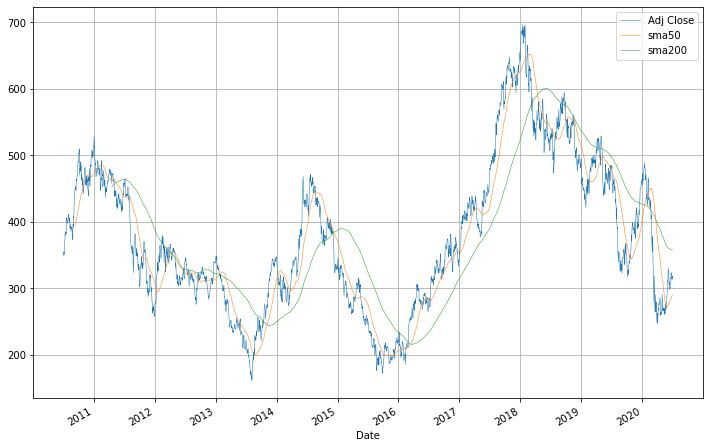

In [66]:
m=50
n=200
df3['sma50']=df3['Adj Close'].rolling(window=m).mean()
df3['sma200']=df3['Adj Close'].rolling(window=n).mean()
df3[['Adj Close','sma50','sma200']].plot(grid=True,linewidth=0.5,figsize=(12,8))
df3['sma50_prev_day']=df3['sma50'].shift(1)
df3['sma200_prev_day']=df3['sma200'].shift(1)
df3.head()


In [69]:
%%timeit
# Create a column called 'signal' which takes values 0, +1, and -1 for no trade that day,
#  buy that day and sell that day respectively. You can use the np.where routine.
# Use the magic command %timeit to check how long it takes to execute it
# Check the first few and last few rows of the data frame
# Check the # of signals of each that you got

df3['signal']=np.where((df3['sma50']>df3['sma200'])
                       &(df3['sma50_prev_day']<df3['sma200_prev_day']),1,0)
df3['signal']=np.where((df3['sma50']<df3['sma200'])
                      &(df3['sma50_prev_day']>df3['sma200_prev_day']),-1,df3['signal'])
df3['signal'].value_counts()
# Use the .apply() method to create two columns 'buy_price' and 'sell_price'. The columns 
# should give you the 'Adj Close' price when the respective buy or sell conditions are met. Record the price
# as positive when it's a buy and negative when it's a sell
# Use the magic command %timeit to check how long it takes to execute it
# Compare the time taken between the two.


3.44 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [71]:
%%timeit
df3['buy_price']=df3.apply(lambda x :x['Adj Close']if x['sma50']>x['sma200']
                          and x['sma50_prev_day']<x['sma200_prev_day']else 0,axis=1)
df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis=1)
df3['trade_price']=df3['buy_price']+df3['sell_price']
df3['trade_price']=df3['trade_price'].replace(to_replace=0,method='ffill')
df3['position']=df3['signal'].replace(to_replace=0,method='ffill')


154 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


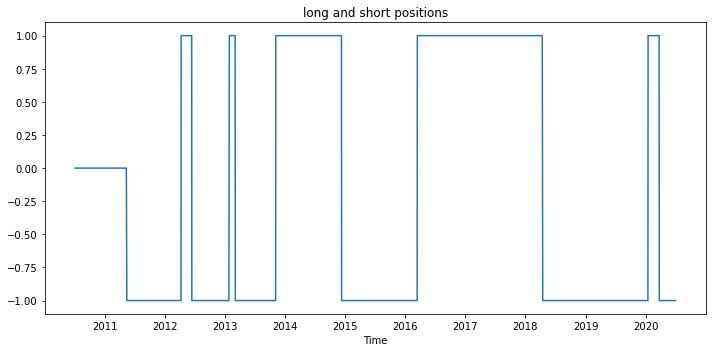

In [74]:
# Plot the positions over time.
# Plot the strategy returns, and buy-and-hold returns.
# Display the strategy returns and buy-and-hold returns.

#alternative way of ploting graph
plt.figure(figsize=(10,5))
plt.plot(df3['position'])
plt.title('long and short positions')
plt.xlabel('Time')
plt.tight_layout()
plt.show()


buy and hold returns -0.1
strategy returns: 0.61


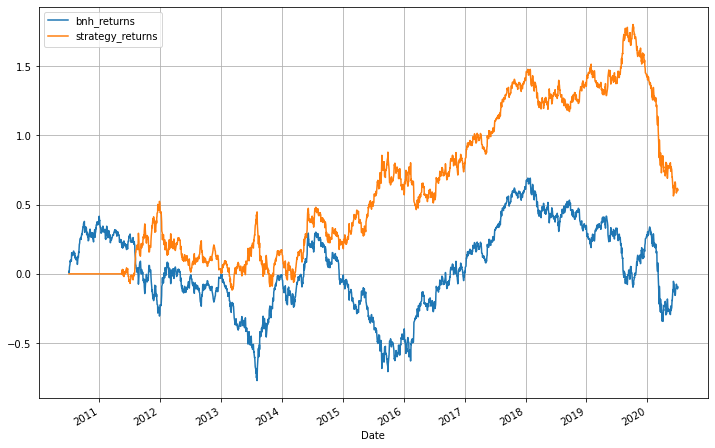

In [75]:
df3['bnh_returns']=np.log(df3['Adj Close']/df3['Adj Close'].shift(1))
df3['strategy_returns']=df3['bnh_returns']*df3['position'].shift(1)
df3[['bnh_returns','strategy_returns']].cumsum().plot(grid=True,figsize=(12,8))
print('buy and hold returns',np.round(df3['bnh_returns'].cumsum()[-1],2))
print('strategy returns:',np.round(df3['strategy_returns'].cumsum()[-1],2))

In [5]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures

In [18]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures

def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        output_name = stock + '.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))

stocksList = ['MSFT', 'AAPL', 'IBM', 'DELL', 'HP', 
              'TSLA', 'AMZN', 'AIG', 'STJ', 'WMT', 
              'LVLT', 'SBUX', 'CL', 'NKE', 'FOSL', 
              'MMM', 'DOW', 'NFLX', 'CVS', 'D' ]
list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10)

# We use the concurrent.futures module's ThreadPoolExecutor 
# to speed up the downloads by doing them in parallel rather than serially

### Set the maximum thread number
max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)
### map allows multiple calls to the given function. It passes each of the items in stocksList (any 
### iterable) to the function. Here, it can happen concurrently because of the ThreadPoolExecutor()
### subClass

Trying to retrieve the MSFT symbol...

Trying to retrieve the AAPL symbol...
Trying to retrieve the IBM symbol...


Trying to retrieve the DELL symbol...

Trying to retrieve the HP symbol...

Trying to retrieve the TSLA symbol...

Trying to retrieve the AMZN symbol...

Trying to retrieve the AIG symbol...

Trying to retrieve the STJ symbol...

Trying to retrieve the WMT symbol...

Trying to retrieve the LVLT symbol...

Trying to retrieve the SBUX symbol...

Trying to retrieve the CL symbol...

Trying to retrieve the NKE symbol...

Trying to retrieve the FOSL symbol...

Trying to retrieve the MMM symbol...

Trying to retrieve the DOW symbol...

Trying to retrieve the NFLX symbol...

Trying to retrieve the CVS symbol...
Trying to retrieve the D symbol...


Problems downloading the LVLT symbol.

Problems downloading the STJ symbol.

Symbol DOW downloaded OK.

Symbol TSLA downloaded OK.
Symbol DELL downloaded OK.


Symbol CL downloaded OK.

Symbol AIG downloaded OK.

Symbol D downloaded OK

In [14]:
import os
os.getcwd()
os.chdir('C:\\Users\\Prakyath\\python')


In [19]:
  bad_tickers


['LVLT', 'STJ']

In [1]:
import talib as tb

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

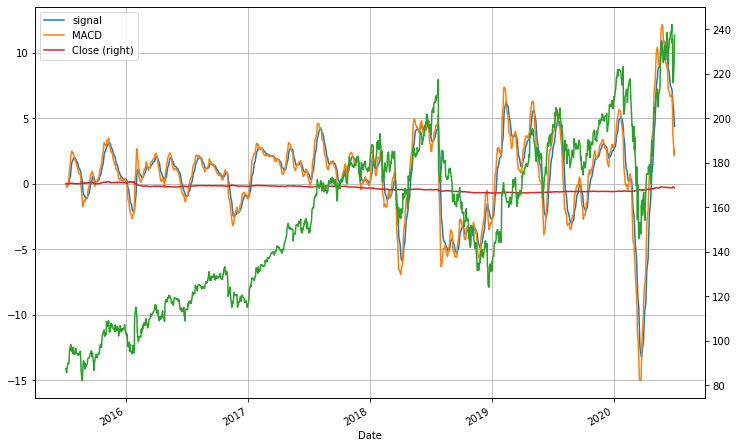

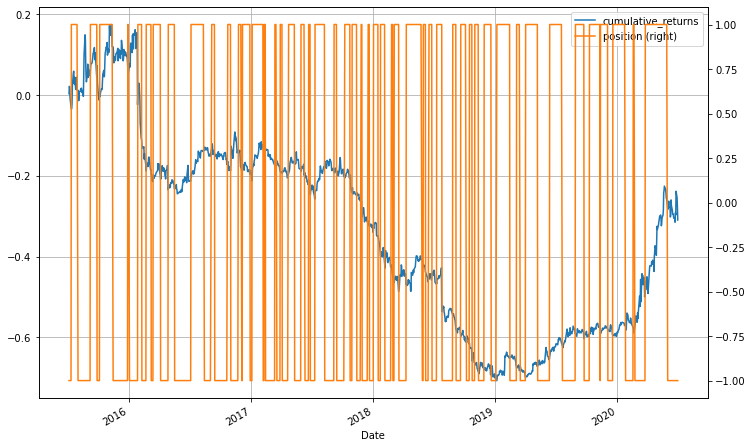

In [7]:
ticker4 = "FB"
end4 = datetime.date(2020, 7, 2)
start4 = end4 - pd.Timedelta(days=365*5)

df = yf.download(ticker4, start4, end4)

df.shape
df.head()
df.tail()

df4 = df.copy()

df4['ema26'] = df4['Close'].ewm(span=26, adjust=False).mean()
df4['ema12'] = df4['Close'].ewm(span=12, adjust=False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']

df4['signal'] = df4['MACD'].ewm(span=9, adjust=False).mean()

df4[['signal', 'MACD', 'Close']].plot(figsize=(12, 8), grid=True, secondary_y='Close')

df4['position'] = np.where(df4['MACD'] > df4['signal'], 1, -1)
df4['position'] = df4['position'].shift(1)

df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns'] * df4['position']

df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod() - 1

df4['cumulative_returns'].plot(figsize=(12, 8), grid=True)

df4[['cumulative_returns', 'position']].plot(figsize=(12, 8), secondary_y='position', grid=True)

Start date,2015-07-06
End date,2020-07-01
Total months,59
,Backtest
Annual return,-7.1%
Cumulative returns,-30.9%
Annual volatility,32.1%
Sharpe ratio,-0.07
Calmar ratio,-0.10
Stability,0.66
Max drawdown,-75.1%


Start date,2015-07-06
End date,2020-07-01
Total months,59
,Backtest
Annual return,22.1%
Cumulative returns,171.3%
Annual volatility,32.0%
Sharpe ratio,0.79
Calmar ratio,0.52
Stability,0.78
Max drawdown,-43.0%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

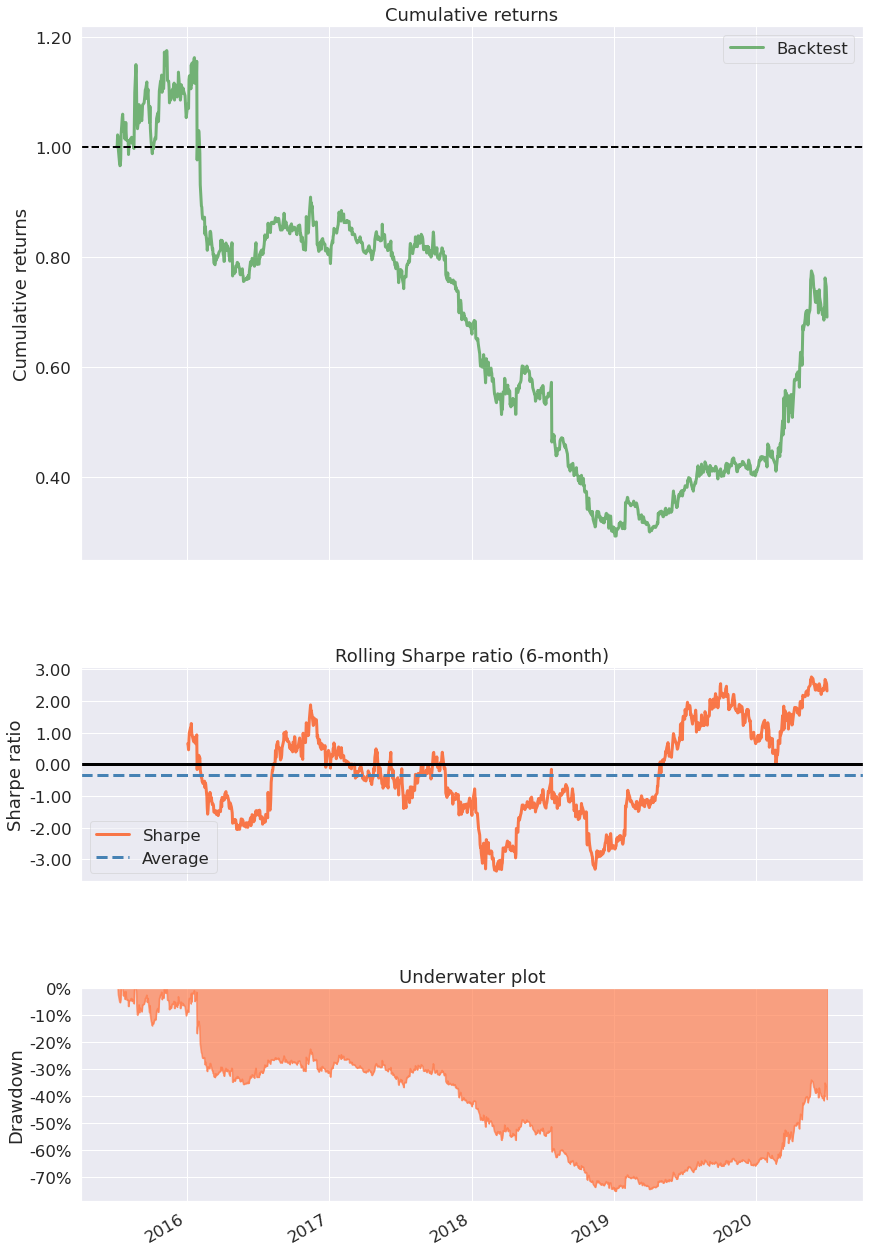

In [8]:
import pyfolio as pf
pf.create_simple_tear_sheet(df4['strategy_returns'], benchmark_rets=None)
pf.create_full_tear_sheet(df4['cc_returns'])